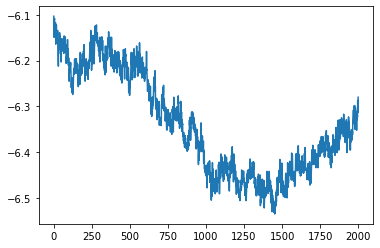

In [1]:
from numba import jit
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

def modlin(x,a,b):
    return a*x+b

px=np.loadtxt('telomers_xx.dat')
py=np.loadtxt('telomers_yy.dat')

Values=px[1]
Dates=np.arange(1,len(Values)+1)

plt.plot(Values)
plt.show()

In [2]:
P=[]

H=0.5
for l in range(len(px)):
        T=np.int64(np.logspace(0.5,3,20))
        X2=np.zeros(len(T))
        Values=px[l]  
        for i in range(len(T)):
            k=T[i]
            Tk=[]
            for u in range(0,len(Values)-k):
                  Tk.append((Values[k+u]-Values[u])**2)
            X2[i]=np.mean(Tk)
        sol=curve_fit(modlin,np.log10(T),np.log10(X2))
        if abs(sol[0][0]-H)<0.05:
            P.append(px[l])
 
        

for l in range(len(py)):
        T=np.int64(np.logspace(0.5,3,20))
        X2=np.zeros(len(T))
        Values=py[l]  
        for i in range(len(T)):
            k=T[i]
            Tk=[]
            for u in range(0,len(Values)-k):
                  Tk.append((Values[k+u]-Values[u])**2)
            X2[i]=np.mean(Tk)
        sol=curve_fit(modlin,np.log10(T),np.log10(X2))
        if abs(sol[0][0]-H)<0.05:
            P.append(py[l])
 
print(len(P))

39


# (e)

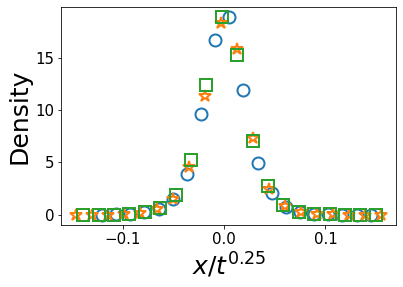

In [3]:
from scipy.stats import norm
i=0
Marker=['o','*','s','p']
H=0.25

for t in [20,40,80]:
    X=[]
    for Values in P:
      for ini in range(0,len(Values)-t):
        x0=Values[ini]
        X.append(Values[ini+t]-x0)
    
    h,bins=np.histogram(np.array(X)/t**H,density=True,bins=20)
    bins=(bins[1:]+bins[:-1])/2
    plt.plot(bins,h,Marker[i],markersize=12,linestyle='',fillstyle='none',linewidth=20,markeredgewidth=2.0)
    i+=1
#Xl=np.linspace(-4,4,1000)
#plt.plot(Xl,norm.pdf(Xl,0,1),'--k',linewidth=2)
#plt.ylim(1e-3,0.5)
#plt.xlim(-3,3)
plt.xticks([-0.1,0,0.1],fontsize=15)
plt.yticks([0,5,10,15],fontsize=15)
plt.xlabel(r'$x/t^{0.25}$',fontsize=25)
plt.ylabel('Density',fontsize=25)
#plt.semilogy()
#plt.savefig('Gauss_telomers.svg')
plt.show()    

/tmp/ipykernel_27967/2835615280.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Tn=np.array([np.array(t) for t in Tn])


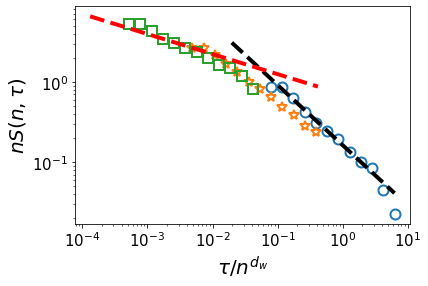

In [33]:
H=0.25

from numba import jit
@jit(nopython=True)
def tau(V):
    T=[]
    M=V[0]
    tau=1
    for k in range(1,len(V)-1):
        if V[k]>M:
            T.append(tau)
            tau=1
        else:
            tau+=1
        M=max(V[k],M)
    return T

T=[]
epochs=12

for m in range(epochs-1): 
  for k in range(len(P)):
    window=len(P[k])//epochs
    T.append(tau(P[k][window*m:]))
    #T.append(tau(py[k][window*m:]))

@jit(nopython=True)
def FreCum(T,Tl):
    S=[]
    for t in Tl:
        S.append(np.sum(T>=t)/len(T))
    return S

Tn=T[:]
Tn=np.array([np.array(t) for t in Tn])



theta=1-H

dw=1/H

N=[1,3,6]
Marker=['o','*','s']
i=-1
for n in N:
    i+=1
    LT=[]
    for t in Tn:
      if len(t)>max(N):
        LT.append(t)
    Times=np.logspace(0.1,2,12)
    Ti=[LT[k][n-1] for k in range(len(LT))]
    Ti=np.array(Ti)
    Ti=Ti[Ti>0]
    Sl=np.array([np.sum(Ti>=ti)/len(Ti) for ti in Times])
    n0=n+1
    #plt.plot(Times,Sl,'o',markersize=5,linestyle='',fillstyle='none',linewidth=20,markeredgewidth=2.0)
    plt.plot(Times/n0**dw,Sl*n0,Marker[i],markersize=10,linestyle='',fillstyle='none',linewidth=20,markeredgewidth=2.0)
    if n==N[-1]:
      Ti=np.logspace(-0.5,3,41)
      plt.plot(Ti/n0**dw,(Ti/Times[len(Times)//4])**(-H)*Sl[len(Times)//4]*n0,'--r',linewidth=4)
    if n==N[0]:
      Ti=np.logspace(-0.5,2,41)  
      plt.plot(Ti/n0**dw,(Ti/Times[len(Times)//4*3-2])**(-theta)*Sl[len(Times)//4*3-2]*n0,'--k',linewidth=4)

plt.xlabel(r'$\tau/n^{d_w}$',fontsize=20)
plt.ylabel(r'$nS(n,\tau)$',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.semilogx()
plt.semilogy()

plt.savefig('Records_telomers_n.svg')